# __Projet 3__

Emilie Cayatte & Cécile-Aurore Wotawa

Nous avons commencé par remettre toutes les lignes de code du projet numérique énoncé 2020.

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

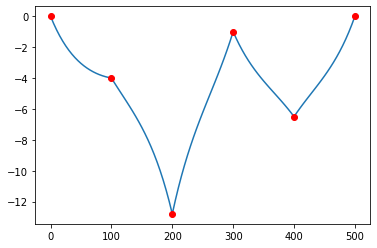

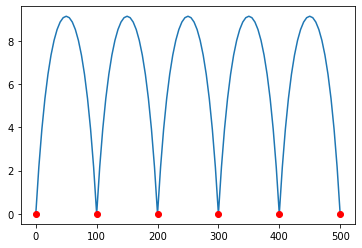

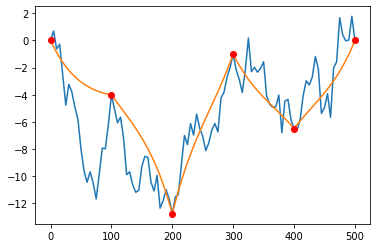

522.438226744917


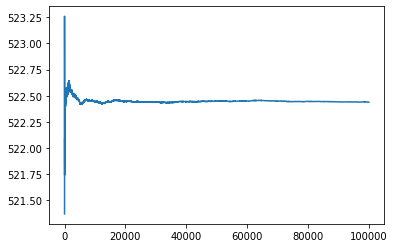

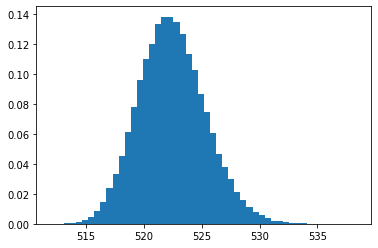

0.18479

In [2]:
#Fonction C

def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)

distmat=abs(np.subtract.outer(discretization,discretization))

Sigma=Covexp(distmat,a,sigma2)

SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]

invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)

print(sum(result)/K)
length(allval1,Delta)

indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

plt.hist(result,50,density=True)
plt.show()

Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

np.quantile(result,[0.025,0.975])

np.mean(result>525)

## __Question 1 :__

On implémente un algorithme de type rejet. On souhaite en particulier ne générer que des valeurs négatives. L'espérance conditionnelle est une variable de la fonction, cela facilitera les prochaines questions.

L'algorithme implémenté risque d'avoir un taux de rejet très élevé, car il génère d'abord l'ensemble des points, puis il regarde un à un si chaque point vérifie la condition souhaitée. Il renvoie alors la simulation si tous les points sont négatifs. 

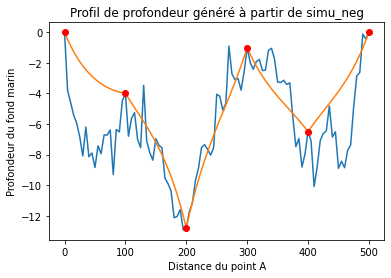

In [3]:
def simu_neg(Ec):
    Cholesky = np.linalg.cholesky(SigmaCond)
    positif = True
    while positif:
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x)
        compteur = 0
        for elt in simu:
            if elt < 0:
                compteur += 1
        if compteur == len(simu):
            positif = False
    return simu

allval4 = np.zeros(N) #on génère un array avec que des zéros
allval4[unknown_indexes]=simu_neg(Ec) #aux coordonnées inconnues, on utilise la simulation implémentée ci dessus
allval4[observation_indexes]=depth #on connait certaines valeurs
plt.plot(discretization,allval4)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.title("Profil de profondeur généré à partir de simu_neg")
plt.xlabel("Distance du point A")
plt.ylabel("Profondeur du fond marin")
plt.show()

## __Question 2 :__

Afin d'observer l'impact de l'algorithme sur les différentes valeurs demandées, on génère les deux profils de profondeur $K$ fois, nommés $\mbox{allval4}$ et $\mbox{allval3}$, qui correspondent respectivement à la simulation sans valeurs positives (cf. question 1) et à la simulation implémentée dans le sujet 2020 (cf. question 7 du sujet 2020).

Pour chaque simulation, on note la longueur de câble (obtenue grâce à $\mbox{length(allval, Delta)}$) dans deux arrays $\mbox{new_result}$ et $\mbox{old_result}$, respectivement pour la simulation sans valeurs positives et celle avec.

Pour comparer les valeurs moyennes des longueurs de câble pour les deux simulations, on renvoie la moyenne arithmétique de chaque array.

In [4]:
K=1000
new_result = np.zeros(K)
old_result = np.zeros(K)

allval3 = np.zeros(N)
allval4 = np.zeros(N)
allval3[observation_indexes]=depth
allval4[observation_indexes]=depth

for i in range(K):
    allval4[unknown_indexes]= simu_neg(Ec)
    new_result[i]=length(allval4,Delta)
    
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    old_result[i]=length(allval3,Delta)

print(f"Valeur moyenne de la longueur de câble - simulation sans valeurs positives : {sum(new_result)/K}")
print(f"Valeur moyenne de la longueur de câble - simulation avec valeurs positives : {sum(old_result)/K}")

521.8963427773209
522.4869771688888


La différence est faible, de l'ordre de $0,5$ m.

On superpose ensuite les deux histogrammes. On observe un léger décalage vers la gauche pour la simulation sans valeurs positives. Cela semble cohérent : le câble risque d'être moins long s'il n'y a pas de pic qui remonte à la surface...

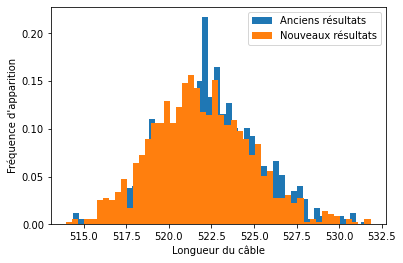

In [5]:
plt.hist(old_result,50,density=True, label = 'Anciens résultats')
plt.hist(new_result,50,density=True, label = 'Nouveaux résultats')
plt.legend()
plt.xlabel("Longueur du câble")
plt.ylabel("Fréquence d'apparition")
plt.show()

On observe le même décalage vers la gauche pour les intervalles de confiance.

In [6]:
print(f"Intervalle de confiance pour l'ancienne simulation (avec valeurs positives) = {np.quantile(old_result,[0.025,0.975])}")

print(f"Intervalle de confiance pour la nouvelle simulation (sans valeurs positives) = {np.quantile(new_result,[0.025,0.975])}")

Intervalle de confiance pour l'ancienne simulation (avec valeurs positives) = [517.26653699 528.19179883]
Intervalle de confiance pour la nouvelle simulation (sans valeurs positives) = [516.42728235 527.76333783]


Le plus gros impact apparaît sur la probabilité de dépassement du seuil de $525$ m, ce qui reste cohérent avec le décalage vers la gauche de la simulation sans valeurs positives.

In [7]:
print(f"Probabilité de dépassement du seuil de 525m pour l'ancienne simulation (avec valeurs positives) = {np.mean(old_result>525)}")
print(f"Probabilité de dépassement du seuil de 525m pour la nouvelle simulation (sans valeurs positives) = {np.mean(new_result>525)}")

Probabilité de dépassement du seuil de 525m pour l'ancienne simulation (avec valeurs positives) = 0.179
Probabilité de dépassement du seuil de 525m pour la nouvelle simulation (sans valeurs positives) = 0.144


On souhaite ensuite estimer le taux de rejet de l'algorithme. On reproduit donc la simulation sans valeurs positives implémentée à la question 1 en y intégrant un compteur.

On considère 10000 simulations pour obtenir un taux de rejet moyen.

In [8]:
n = 10000

def simu_neg_avec_taux():
    Cholesky = np.linalg.cholesky(SigmaCond)
    positif = True
    proba = 0
    while positif:
        proba += 1
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x)
        compteur = 0
        for elt in simu:
            if elt < 0:
                compteur += 1
        if compteur == len(simu):
            positif = False
    return (proba-1)/proba

result = 0
for i in range(n):
    result += simu_neg_avec_taux()
print(f"Taux de rejet moyenné sur {n} simulations = {result/n}")

Taux de rejet moyenné sur 10000 simulations = 0.8711410291526236


On obtient, comme attendu, un taux de rejet très élevé.

## __Question 3 :__

On veut montrer que $\mu_{|Z_{OBS}=z_{OBS}}$ $\sim$  $\mathcal{N}(\widehat{\mu}, \widehat{\sigma}^2)$ 


 Donc on va calculer $f_{z_{OBS}, \mu}$ $(Z_{OBS} , \hat\mu)$ 
 $$
 $$

 $f_{z_{OBS}, \mu}$ $(Z_{OBS} , \hat\mu)$ $=$ $f_{\mu | Z_{OBS}=z_{OBS}}$ $(\hat \mu)$ $\times f_{Z_{OBS}=z_{OBS}} (z_{OBS})$

 
$f_{z_{OBS}, \mu}$ $(Z_{OBS} , \hat\mu)$$=$ $f_{z_{OBS} | \mu =\hat \mu}$ $(z_{OBS})$ $\times f_{\mu}(\hat \mu)$


Or  $Z_{OBS} | \mu =\hat \mu$ $\sim$  $\mathcal{N}(\widehat{\mu}, C_{OBS})$ et $\mu \sim$ $\mathcal{N} (-5, 4)$

Donc en prenant $-2ln(f)$ on obtient:
$-2ln(f)= (z_{OBS}-\mathbb{1} \hat \mu)^t C_{OBS}^{-1} (z_{OBS}-\mathbb{1} \hat \mu) + (\frac{5+\hat \mu}{2})^2 + constante$ 


Puisque qu'on cherche $f_{\mu_{|Z_{OBS}=z_{OBS}}}$ on ne s'intéresse qu'aux termes en $\mu$ qu'on note $f_1$


$f_1$ $=$ $\mu^2$ $\times$ $(\mathbb{1}^t C_{OBS}^{-1}\mathbb{1}$ $+ \frac{1}{4})$  $-2  \mu \times (\mathbb{1} C_{OBS}^{-1}z_{OBS}-\frac{5}{4}) + constante'$


On pose 
$$
\hat \sigma^2=(\mathbb{1}^t C_{OBS}^{-1} \mathbb{1}+ \frac{1}{4})^{-1}
$$ 
et
on pose 
$$
\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )
$$

 


 Calculons 
 $$
 f_2(\mu)=\frac{(\mu - \hat \mu)^2}{\hat \sigma^{2}}
 $$
 
 $$
 f_2(\mu)=\mu^2 \times \hat \sigma^{-2}+\hat \mu^2 \times \hat \sigma^{-2} -2\hat \mu \times \mu \times \hat \sigma^{-2}
 $$
 $$
 f_2=\mu^2 \times \hat \sigma^{-2}+\widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )^2-2\widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )\times \mu
 $$
 
 
 Par identification (avec $constante'$ que l'on a pas explicité) on a bien $f_1=f_2$ et donc $\mu_{|Z_{OBS}=z_{OBS}}$ $\sim$  $\mathcal{N}(\widehat{\mu}, \widehat{\sigma}^2)$ 

## __Question 4 :__

Soit X, Y et Z trois vecteurs aléatoires à densité.

On utilise la formule de Bayes pour obtenir la relation souhaitée, soit :

$$
f_{(X,Y)|Z = z} (x, y) = \frac{f_{X,Y,Z}(x,y,z)}{f_Z(z)}
\\
f_{(X,Y)|Z = Z} (x, y) = \frac{f_{X,Y,Z}(x,y,z)}{f_{Y,Z}(y,z)} \times \frac{f_{Y,Z}(y,z)}{f_Z(z)}
\\
f_{(X,Y)|Z = Z} (x, y) = f_{X|Y = y, Z = z}(x) \times f_{Y|Z = z}(y)
$$

On obtient la relation souhaitée.

## __Question 5 :__

vecteur gaussien chap 2
identifier avec qu 4

En utilisant la question 4, avec $X = Z_{UNK}$, $Y = \mu$ et $Z = Z_{OBS}$, on a déjà :
$$
f_{(Z_{UNK},\mu)|Z_{OBS} = z_{OBS}} (z_{UNK}, \mu*) = f_{Z_{UNK}|\mu = \mu*, Z_{OBS} = z_{OBS}}(z_{UNK}) \times f_{\mu|Z_{OBS} = z_{OBS}}(\mu*)
$$

Or, d'après la question 3, on a $\mu|Z_{OBS} = z_{OBS}$ suit une loi normale d'espérance $\hat{\mu}$ et de variance $\hat{\sigma}^2$.

On a donc : 
$$
f_{\mu|Z_{OBS} = z_{OBS}}(\mu*) = \frac{1}{\sqrt{2\pi} \times \hat{\mu}} \times exp(-\frac{(\mu*-\hat{\mu})^{2}}{2 \hat{\sigma}^2})
$$

De plus, d'après la partie 1 et l'indication, on a :
$$
f_{Z_{UNK}|\mu = \mu*, Z_{OBS} = z_{OBS}}(z_{UNK}) = \frac{1}{(2\pi)^{n/2} \times \sqrt{det(C)}} \times exp(-\frac{1}{2}(z_{UNK}-\mu*)^{t}C^{-1}(z_{UNK}-\mu*))
$$

## __Question 6 :__


In [ ]:
C1 = np.linalg.inv(SigmaObs)
I = np.array([1,1,1,1,1,1], float)
B = I.T
D = np.dot(B,C1)
sigma_moy = (np.dot(D,I) +0.25)**(-1)

F = np.dot(B,C1)
H = np.dot(F,depth)
mu_moy = sigma_moy*(H-1.25)

## __Question 7 :__

Afin de générer une loi normale, on utilise la simulation de Box Muller. Dans l'algorithme implémenté $\mbox{simu_mu}$ on génère $n$ points.

In [9]:
def simu_mu(n):
    result = np.empty(n)
    i = 0
    while i < n:
        u = np.random.rand(1)
        v = np.random.rand(1)
        candidat = mu_moy + sigma_moy*np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
        if candidat < 0: #on vérifie la condition imposé mu < 0
            result[i] = candidat
            i += 1
    return result

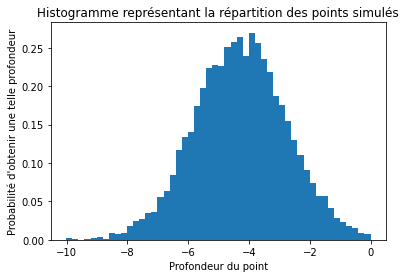

In [11]:
plt.hist(simu_mu(10000),50,density=True)
plt.title("Histogramme représentant la répartition des points simulés")
plt.xlabel("Profondeur du point")
plt.ylabel("Probabilité d'obtenir une telle profondeur")
plt.show()

## __Question 8 :__

Pour générer le couple $Z_{UNK}$, $\mu$ | $Z_{OBS}$, $\mu < 0$, on génère tout d'abord $\mu$ puis on en déduit l'espérance conditionnelle, notée $Ec$. On utilise alors l'algorithme de la question 1 pour générer uniquement des valeurs négatives.

In [12]:
def simu_couple():
    mu = simu_mu(1)
    Ec= mu + np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
    allval = np.zeros(N)
    allval[unknown_indexes]=simu_neg(Ec)
    allval[observation_indexes]=depth
    return (allval, mu)


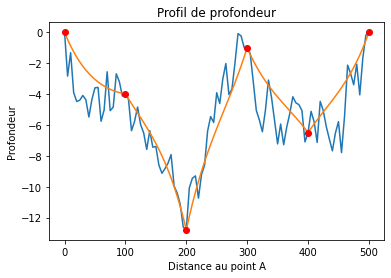

In [13]:
plt.plot(discretization,simu_couple()[0])
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.title("Profil de profondeur")
plt.xlabel("Distance au point A")
plt.ylabel("Profondeur")
plt.show()

## __Question 9 :__

On génère 10 000 profils de profondeur et on calcule les longueurs de câble associées grâce à $\mbox{length(allval,Delta)}$. Afin de comparer les deux algorithmes, on stocke les valeurs dans deux arrays, notés $\mbox{new_result}$ et $\mbox{old_result}$, respectivement algo de la question 1 et algo de la question 8.

On compare tout d'abord les valeurs moyennes des longueurs de câble.

In [14]:
K=10000
new_result = np.zeros(K)
old_result = np.zeros(K)

allval4 = np.zeros(N)
allval4[observation_indexes]=depth

for i in range(K):
    allval4[unknown_indexes]= simu_neg(Ec)
    old_result[i]=length(allval4,Delta)
    
    allval = simu_couple()[0]
    new_result[i]=length(allval,Delta)

print(f"Valeur moyenne de la longueur du câble - algorithme question 8 : {sum(new_result)/K}")
print(f"Valeur moyenne de la longueur du câble - algorithme question 1 : {sum(old_result)/K}")

Valeur moyenne de la longueur du câble - algorithme question 8 : 521.7329515356989
Valeur moyenne de la longueur du câble - algorithme question 1 : 521.8436925707762


Les valeurs sont très proches.

On compare ensuite les histogrammes.

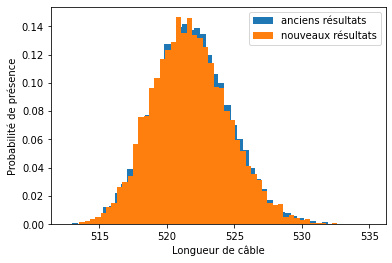

In [15]:
plt.hist(old_result,50,density=True, label = 'anciens résultats')
plt.hist(new_result,50,density=True, label = 'nouveaux résultats')
plt.xlabel("Longueur de câble")
plt.ylabel("Probabilité de présence")
plt.legend()
plt.show()

On constate que les deux histogrammes sont très peu différents. Ils se superposent assez bien.

On compare ensuite les intervalles de confiance obtenues par la méthode des quantiles.

In [16]:
print(f"Intervalle de confiance - algo question 1 : {np.quantile(old_result,[0.025,0.975])}")

print(f"Intervalle de confiance - algo question 8 : {np.quantile(new_result,[0.025,0.975])}")

Intervalle de confiance - algo question 1 : [516.56824253 527.67773214]
Intervalle de confiance - algo question 8 : [516.51239112 527.60860241]


Encore une fois, l'intervalle de confiance fluctue très peu.

On compare enfin la probabilité de dépassement du seuil de 525m.

In [17]:
print(f"Probabilité de dépassement du seuil de 525m - algo question 1 : {np.mean(old_result>525)}")
print(f"Probabilité de dépassement du seuil de 525m - algo question 8 : {np.mean(new_result>525)}")

Probabilité de dépassement du seuil de 525m - algo question 1 : 0.1354
Probabilité de dépassement du seuil de 525m - algo question 8 : 0.1268


Le plus gros écart entre les deux algorithmes apparaît sur le dépassement du seuil de 525m.

Enfin, voici la convergence du dernier algorithme.

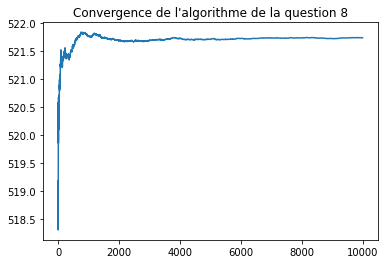

In [19]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(new_result)/indice_simu)
plt.title("Convergence de l'algorithme de la question 8")
plt.show()

## __Question 10 :__

Si on rendait aléatoires les autres paramètres, on observerait beaucoup de fluctuations.